# Plot the average number of type per page by party

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("../data/house_analysis/party_cat_avg_new.csv")

In [81]:
df

,party,category,counts
0,Democrat,campaign_personal,1.712548
1,Democrat,education,1.483199
2,Democrat,gov,3.901965
3,Democrat,news,9.230810
4,Democrat,other_third_party,6.052071
5,Democrat,social,3.322188
6,Democrat,NaN,1.687913
7,Independent,campaign_personal,1.000165
8,Independent,education,2.000000
9,Independent,gov,3.808104


In [82]:
# make plotable bar plot
df_matrix = df.pivot_table(index='category', columns='party', values='counts')

In [83]:
df_matrix

party,Democrat,Independent,Republican
category,,,
campaign_personal,1.712548,1.000165,1.406302
education,1.483199,2.000000,1.259475
gov,3.901965,3.808104,3.717142
news,9.230810,7.984358,7.637652
other_third_party,6.052071,7.836503,5.203846
social,3.322188,3.541417,2.722114


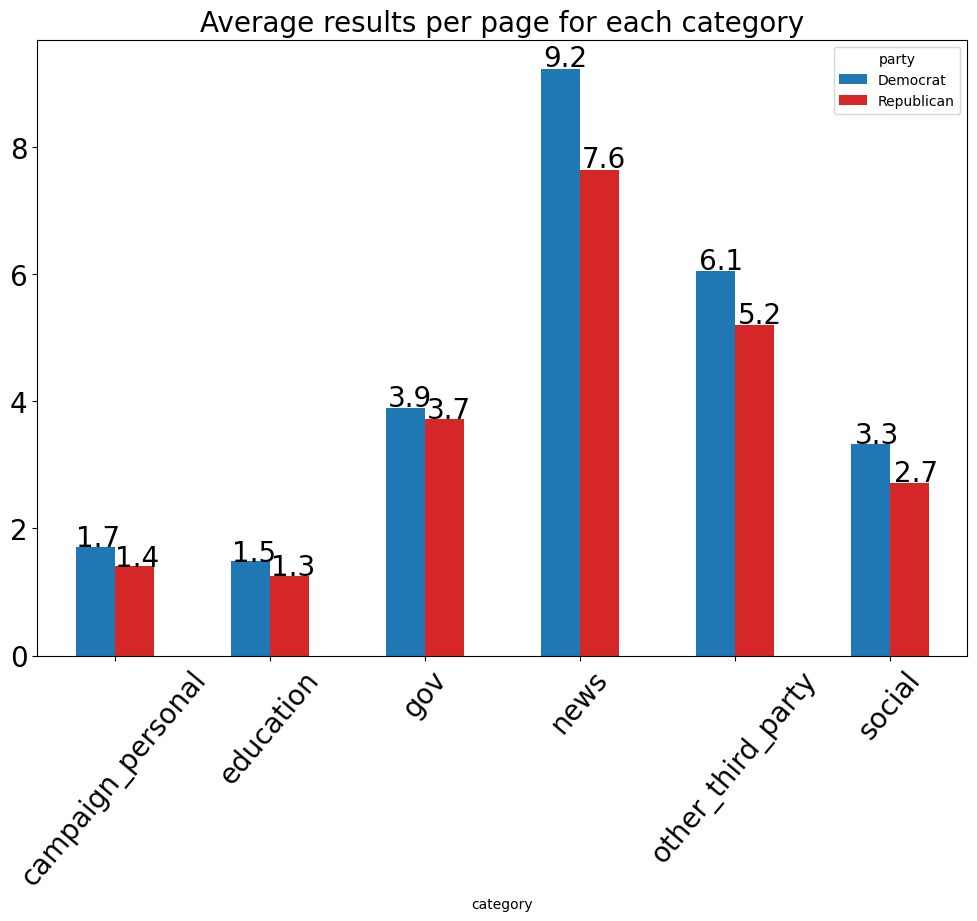

In [85]:
# plotting graph 
fig, ax = plt.subplots(figsize=(12,8)); 


df_matrix.plot( y=["Democrat", "Republican"], kind="bar", color=['#1f77b4', '#d62728'], ax=ax)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=20)

plt.xticks(fontsize=20, rotation = 50)
plt.yticks(fontsize=20)
plt.title("Average results per page for each category", fontsize=20)
plt.savefig("../../data/plots/house_analysis/category_avg_party.png", bbox_inches='tight', dpi=200) 
plt.show()

# Sanity check

In [67]:
3*0.001796+2*0.004291+6*0.205175+15*0.422920+9*0.186110+5*0.179708

10.16235

In [29]:
DATA_ROOT = "/net/data-backedup/lab-lazer/web_search/intermediate_files/preprocessing"
raw_df = os.path.join(DATA_ROOT, "sanity_check/merged-counts/party_cat_avg_raw.csv")

In [30]:
df_raw = pd.read_csv(raw_df)

In [31]:
df_raw

,qry,loc_id,party,category,counts
0,Abby Finkenauer,"AK-AT LARGE,Alaska,United States",Democrat,campaign_personal,4
1,Abby Finkenauer,"AK-AT LARGE,Alaska,United States",Democrat,gov,12
2,Abby Finkenauer,"AK-AT LARGE,Alaska,United States",Democrat,news,44
3,Abby Finkenauer,"AK-AT LARGE,Alaska,United States",Democrat,other_third_party,20
4,Abby Finkenauer,"AK-AT LARGE,Alaska,United States",Democrat,social,8
...,...,...,...,...,...
198797309,Zoe Lofgren,"WY-AT LARGE,Wyoming,United States",Democrat,gov,3
198797310,Zoe Lofgren,"WY-AT LARGE,Wyoming,United States",Democrat,news,6
198797311,Zoe Lofgren,"WY-AT LARGE,Wyoming,United States",Democrat,other_third_party,6
198797312,Zoe Lofgren,"WY-AT LARGE,Wyoming,United States",Democrat,social,2


In [32]:
df_raw['counts'].sum()

np.int64(1212457098)

In [ ]:
df_raw

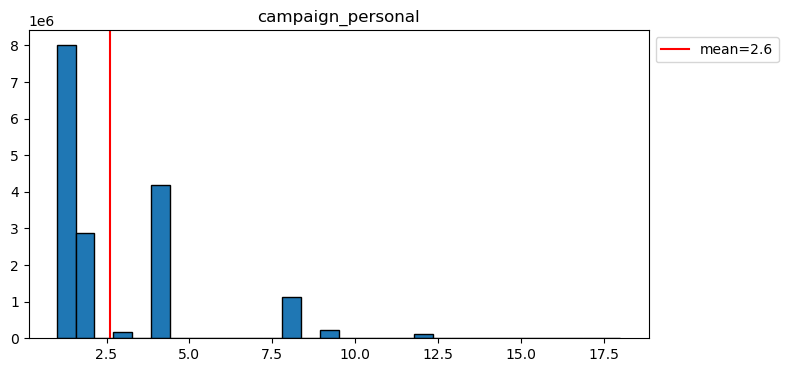

In [47]:
fig, ax = plt.subplots(figsize = (8, 4))
df_plot = df_raw[(df_raw['party']== "Democrat") & (df_raw['category']== "campaign_personal")]
plt.hist(df_plot['counts'], edgecolor='black', bins=30)
plot_mean = df_plot['counts'].mean()
plt.axvline(x = plot_mean, color = 'r',label = 'mean='+str(round(plot_mean, 1)))
# plt.xticks(rotation='vertical')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
 
# plt.xlabel('Democratic number of results in page')
# plt.ylabel('frequency')
plt.title("campaign_personal")
plt.savefig("../../data/plots/house_analysis/campaign_personal.png", bbox_inches='tight', dpi=200) 
plt.show()

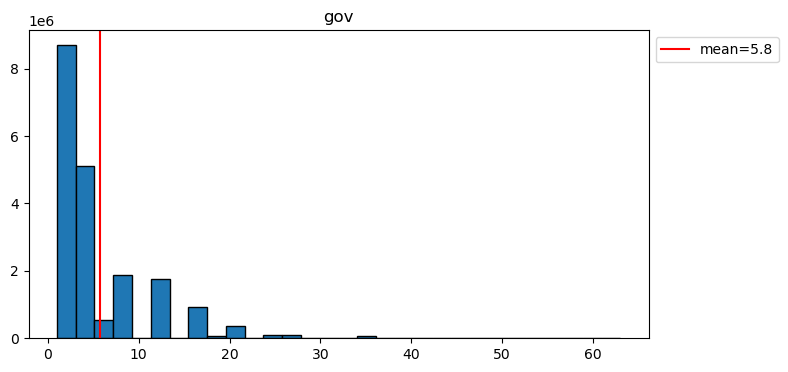

In [48]:
fig, ax = plt.subplots(figsize = (8, 4))
df_plot = df_raw[(df_raw['party']== "Democrat") & (df_raw['category']== "gov")]
plt.hist(df_plot['counts'], edgecolor='black', bins=30)
plot_mean = df_plot['counts'].mean()
plt.axvline(x = plot_mean, color = 'r',label = 'mean='+str(round(plot_mean, 1)))
# plt.xticks(rotation='vertical')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
 
# plt.xlabel('Democratic number of results in page')
# plt.ylabel('frequency')
plt.title("gov")
plt.savefig("../../data/plots/house_analysis/gov.png", bbox_inches='tight', dpi=200) 
plt.show()

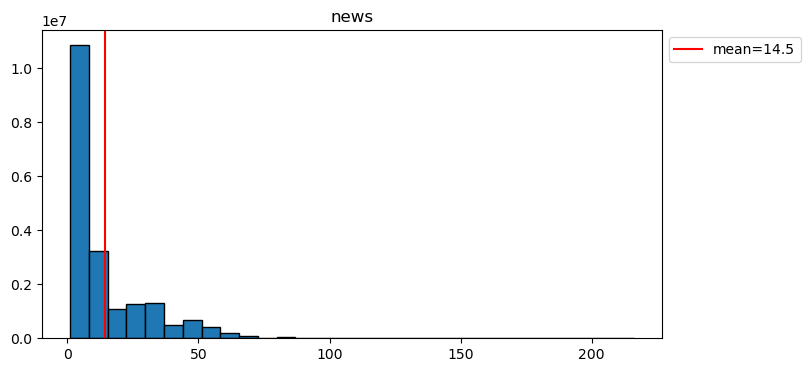

In [49]:
fig, ax = plt.subplots(figsize = (8, 4))
df_plot = df_raw[(df_raw['party']== "Democrat") & (df_raw['category']== "news")]
plt.hist(df_plot['counts'], edgecolor='black', bins=30)
plot_mean = df_plot['counts'].mean()
plt.axvline(x = plot_mean, color = 'r',label = 'mean='+str(round(plot_mean, 1)))
# plt.xticks(rotation='vertical')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
 
# plt.xlabel('Democratic number of results in page')
# plt.ylabel('frequency')
plt.title("news")
plt.savefig("../../data/plots/house_analysis/news.png", bbox_inches='tight', dpi=200) 
plt.show()

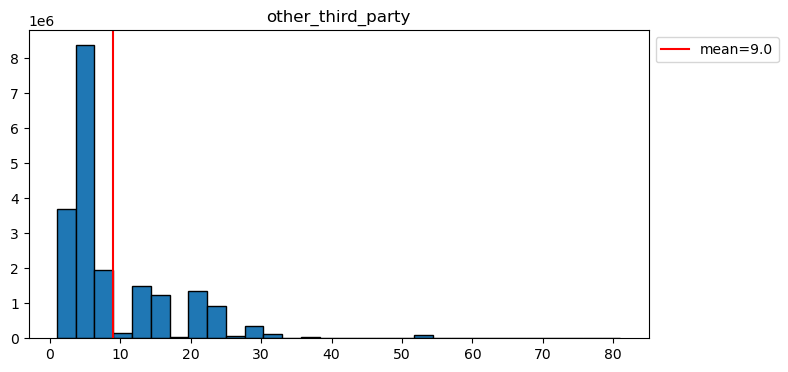

In [50]:
fig, ax = plt.subplots(figsize = (8, 4))
df_plot = df_raw[(df_raw['party']== "Democrat") & (df_raw['category']== "other_third_party")]
plt.hist(df_plot['counts'], edgecolor='black', bins=30)
plot_mean = df_plot['counts'].mean()
plt.axvline(x = plot_mean, color = 'r',label = 'mean='+str(round(plot_mean, 1)))
# plt.xticks(rotation='vertical')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
 
# plt.xlabel('Democratic number of results in page')
# plt.ylabel('frequency')
plt.title("other_third_party")
plt.savefig("../../data/plots/house_analysis/other_third_party.png", bbox_inches='tight', dpi=200) 
plt.show()

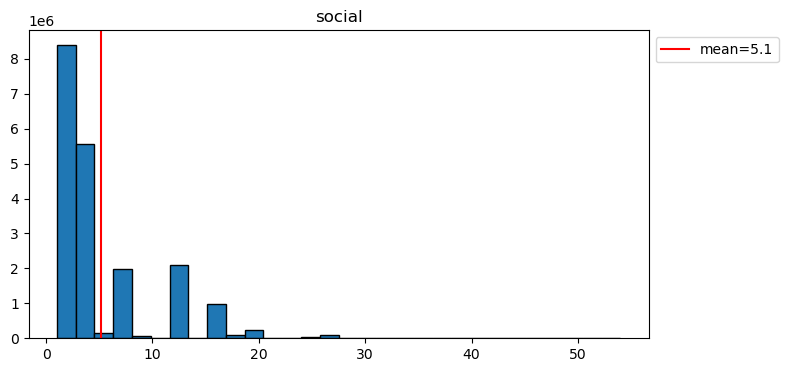

In [51]:
fig, ax = plt.subplots(figsize = (8, 4))
df_plot = df_raw[(df_raw['party']== "Democrat") & (df_raw['category']== "social")]
plt.hist(df_plot['counts'], edgecolor='black', bins=30)
plot_mean = df_plot['counts'].mean()
plt.axvline(x = plot_mean, color = 'r',label = 'mean='+str(round(plot_mean, 1)))
# plt.xticks(rotation='vertical')

# place legend outside
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
 
# plt.xlabel('Democratic number of results in page')
# plt.ylabel('frequency')
plt.title("social")
plt.savefig("../../data/plots/house_analysis/social.png", bbox_inches='tight', dpi=200) 
plt.show()